# Applied AI Assignment 2 (COMP534)
## Names of Students
## Aryan Agarwal (201733167)
## Soumitra Chakraborty (201754798)
## Sourav Surya Majumdar (201767474)

### Importing the necessary libraries to conduct our test We are primarily using Tensorflow to tune and train our MLP and CNN Models

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install -q -U keras-tuner

import keras_tuner
from keras_tuner import RandomSearch
np.random.seed(42)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.9 MB/s eta 0:00:00


In [2]:
import time # Importing time to record the time taken for each tuning and execution
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, Conv2D,MaxPooling2D # Im[porting the deep layers we will use for tuning
from tensorflow.keras.optimizers import SGD, Adam, RMSprop # Importing the types of optimizer we will use for tuning
from tensorflow.keras.activations import relu, elu, selu
from tensorflow.keras.regularizers import l1, l2 # Importing the types of regularization we will use for tuning
from kerastuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns # Importing seaborn to plot the confusion matrix heat map for MLP and CNN
from sklearn.metrics import confusion_matrix, classification_report # Importing SKLearn to call the Consusion_matrix function and

<ipython-input-2-12bcff96f36e>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


### Importing the EMNIST Balanced dataset training and test and the mapping from Google Cloud

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Applied AI Assignment 2
# we use the pd.read_csv() function to read the data from the provided dataset
train_dataset = pd.read_csv('emnist-balanced-train.csv', header = None)
test_dataset = pd.read_csv('emnist-balanced-test.csv', header = None)

/content/drive/MyDrive/Applied AI Assignment 2


In [5]:
char_mapp = {0:48,1:49,2:50,3:51,4:52,5:53,6:54,7:55,8:56,9:57,10:65,11:66,12:67,13:68,14:69,15:70,16:71,17:72,18:73,19:74,20:75,21:76,22:77,23:78,24:79,25:80,26:81,27:82,28:83,29:84,30:85,31:86,32:87,33:88,34:89,35:90,36:97,37:98,38:100,39:101,40:102,41:103,42:104,43:110,44:113,45:114,46:116}

char_mapp

{0: 48,
 1: 49,
 2: 50,
 3: 51,
 4: 52,
 5: 53,
 6: 54,
 7: 55,
 8: 56,
 9: 57,
 10: 65,
 11: 66,
 12: 67,
 13: 68,
 14: 69,
 15: 70,
 16: 71,
 17: 72,
 18: 73,
 19: 74,
 20: 75,
 21: 76,
 22: 77,
 23: 78,
 24: 79,
 25: 80,
 26: 81,
 27: 82,
 28: 83,
 29: 84,
 30: 85,
 31: 86,
 32: 87,
 33: 88,
 34: 89,
 35: 90,
 36: 97,
 37: 98,
 38: 100,
 39: 101,
 40: 102,
 41: 103,
 42: 104,
 43: 110,
 44: 113,
 45: 114,
 46: 116}

In [6]:
class_mapp = {}
for i in char_mapp:
  class_mapp[i] = chr(char_mapp[i])
class_mapp

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [7]:
# Viewing the dataset information using .info() function
print(train_dataset.info())
print(test_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112800 entries, 0 to 112799
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 675.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 112.6 MB
None


### Separating the data into target and images and viewing

In [8]:
# Identifying the classification column and separating the data on the basis of that
train_images = train_dataset.drop(columns = 0)
train_target = train_dataset[0]

train_images.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Identifying the classification column and separating the data on the basis of that
test_images = test_dataset.drop(columns = 0)
test_target = test_dataset[0]

train_images.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reformatting the images in 28x28 for viewing it

In [10]:
# Reformatting the image and normalizing the images by diving by 255
X_train = train_images.to_numpy().reshape(112800,28,28) / 255.0
X_test = test_images.to_numpy().reshape(18800,28,28) / 255.0

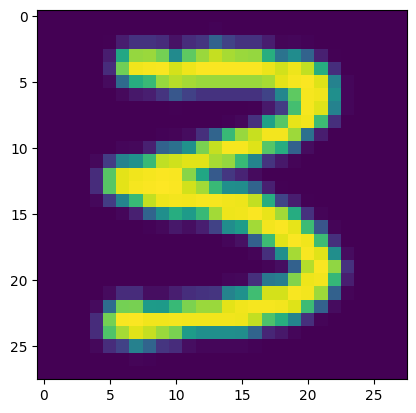

In [11]:
# Viewing the test and train images
plt.imshow(X_train[24])
plt.show()

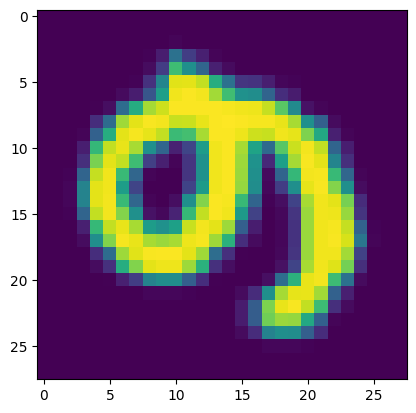

In [12]:
# Viewing the test and train images
plt.imshow(X_test[24])
plt.show()

In [13]:
# converting the y_test and y-train into the desired numpy format
y_train = train_target.to_numpy().reshape(112800,1)
y_test = test_target.to_numpy().reshape(18800, 1)
# converting the train and test data into tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

### Defining the base MLP and CNN models for reference

In [ ]:
# Define base MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 1D array
    Dense(128, activation='relu'),  # 1st hidden layer with 128 neurons
    Dense(64, activation='relu'),   # 2nd hidden layer with 64 neurons
    Dense(32, activation='relu'),   # 3rd hidden layer with 32 neurons
    Dense(47, activation='softmax') # Output layer with 47 classes (EMNIST has 47 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 47)                1551      
                                                                 
Total params: 112367 (438.93 KB)
Trainable params: 112367 (438.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fitting the model and viewing the accuracy anbd loss for the base model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/10
3173/3173 [==============================] - 17s 5ms/step - loss: 1.1109 - accuracy: 0.6727 - val_loss: 0.7474 - val_accuracy: 0.7589
Epoch 2/10
3173/3173 [==============================] - 15s 5ms/step - loss: 0.6573 - accuracy: 0.7884 - val_loss: 0.6272 - val_accuracy: 0.7985
Epoch 3/10
3173/3173 [==============================] - 16s 5ms/step - loss: 0.5681 - accuracy: 0.8123 - val_loss: 0.5852 - val_accuracy: 0.8068
Epoch 4/10
3173/3173 [==============================] - 16s 5ms/step - loss: 0.5167 - accuracy: 0.8270 - val_loss: 0.5902 - val_accuracy: 0.8046
Epoch 5/10
3173/3173 [==============================] - 17s 5ms/step - loss: 0.4822 - accuracy: 0.8356 - val_loss: 0.5638 - val_accuracy: 0.8127
Epoch 6/10
3173/3173 [==============================] - 16s 5ms/step - loss: 0.4563 - accuracy: 0.8426 - val_loss: 0.5600 - val_accuracy: 0.8179
Epoch 7/10
3173/3173 [==============================] - 15s 5ms/step - loss: 0.4355 - accuracy: 0.8483 - val_loss: 0.5671 - val_ac

In [ ]:
# Define a base CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(47, activation='softmax')  # 47 classes for EMNIST
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

### Hypertuning the Models to refine the performance by changing the Adadptive Learning Rate, Droupout, Regularization, Depp Layer Numebrs and Optimizers

#### Hypertuning the MLP model

In [23]:
# Defining the Learning Rate Scheduler functions
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callback1 = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [24]:
# Defining the ReduceLROnPlateau function
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)


In [ ]:
from tensorflow.keras import layers
def build_mlp_model(hp):
      model = Sequential()
      model.add(Flatten(input_shape=(28, 28, 1)))

      # Explore activation functions
      hp_activation = hp.Choice('activation', values=['relu', 'leaky_relu', 'elu'])
      if hp_activation == 'leaky_relu':
        model.add(layers.LeakyReLU(alpha=0.1))
      elif hp_activation == 'elu':
        model.add(layers.ELU())
      else:
        model.add(layers.Activation(hp_activation))

      # Explore number of hidden layers and neurons
      for i in range(hp.Int('num_layers', 2, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                   activation=hp_activation))

      # Explore Batch Normalization
      if hp.Boolean('batch_normalization'):
          model.add(layers.BatchNormalization())

      # Explore L1 & L2 regularization
      hp_regularizer = hp.Choice('regularization', values=['none', 'l1', 'l2'])
      if hp_regularizer == 'l1':
          model.add(layers.Dense(units=47, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
      elif hp_regularizer == 'l2':
          model.add(layers.Dense(units=47, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      else:
          model.add(layers.Dense(units=47, activation='softmax'))

      # Explore Dropout
      if hp.Boolean('dropout'):
          model.add(layers.Dropout(0.5))

      # Compile model
      hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
      model.compile(optimizer=hp_optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

      return model

In [ ]:
# Define tuner
mlp_tuner = RandomSearch(
    build_mlp_model,
    objective='val_accuracy',
    max_trials=10,
    directory='mlp_keras_tuner_results',
    project_name='emnist_mlp_classification',
    overwrite = True
)

In [ ]:
# Perform hyperparameter tuning
mlp_tuner.search(X_train, y_train, epochs=10, validation_split=0.1)

Trial 10 Complete [00h 02m 24s]
val_accuracy: 0.6719858050346375

Best val_accuracy So Far: 0.8484042286872864
Total elapsed time: 00h 25m 14s


In [ ]:
# Getting the optimised hyperparameters listed
mlp_tuner.get_best_hyperparameters()[0].values

{'activation': 'elu',
 'num_layers': 5,
 'units_0': 320,
 'units_1': 288,
 'batch_normalization': True,
 'regularization': 'none',
 'dropout': False,
 'optimizer': 'rmsprop',
 'units_2': 160,
 'units_3': 512,
 'units_4': 480}

In [ ]:
# Creating two instances for the two callbacks and adaptive learning rates we are going use
mlp_scheduled=mlp_tuner.get_best_models(num_models=1)[0]
mlp_reduced=mlp_tuner.get_best_models(num_models=1)[0]

In [ ]:
start_time = time.time()
mlp_history_1 = mlp_scheduled.fit(X_train, y_train, epochs = 20, initial_epoch = 10, validation_split = 0.1, callbacks = [callback1])
end_time = time.time()
run_time = end_time - start_time
# Printing the runtime for scheduled lr runtime
print(run_time)

Epoch 11/20
3173/3173 [==============================] - 18s 5ms/step - loss: 0.2954 - accuracy: 0.8911 - val_loss: 0.4746 - val_accuracy: 0.8497 - lr: 9.0484e-04
Epoch 12/20
3173/3173 [==============================] - 20s 6ms/step - loss: 0.2735 - accuracy: 0.8984 - val_loss: 0.4971 - val_accuracy: 0.8426 - lr: 8.1873e-04
Epoch 13/20
3173/3173 [==============================] - 15s 5ms/step - loss: 0.2523 - accuracy: 0.9048 - val_loss: 0.4967 - val_accuracy: 0.8481 - lr: 7.4082e-04
Epoch 14/20
3173/3173 [==============================] - 16s 5ms/step - loss: 0.2361 - accuracy: 0.9097 - val_loss: 0.4937 - val_accuracy: 0.8529 - lr: 6.7032e-04
Epoch 15/20
3173/3173 [==============================] - 16s 5ms/step - loss: 0.2185 - accuracy: 0.9164 - val_loss: 0.5180 - val_accuracy: 0.8487 - lr: 6.0653e-04
Epoch 16/20
3173/3173 [==============================] - 16s 5ms/step - loss: 0.2044 - accuracy: 0.9205 - val_loss: 0.5114 - val_accuracy: 0.8531 - lr: 5.4881e-04
Epoch 17/20
3173/3173 

In [ ]:
# Trying to asses and find out the accuracy
accuracy_1, loss_1 = mlp_scheduled.evaluate(X_test, y_test)
print(accuracy_1)
print(loss_1)

588/588 [==============================] - 1s 2ms/step - loss: 0.7688 - accuracy: 0.8525
0.7688477635383606
0.8525000214576721


In [ ]:
start_time = time.time()
mlp_history_2 = mlp_reduced.fit(X_train, y_train, epochs = 20, initial_epoch = 10, validation_split = 0.1, callbacks = [reduce_lr])
end_time = time.time()
run_time = end_time - start_time
# Printing the runtime for reduced lr runtime
print(run_time)

Epoch 11/20
3173/3173 [==============================] - 17s 5ms/step - loss: 0.3063 - accuracy: 0.8880 - val_loss: 0.4889 - val_accuracy: 0.8484 - lr: 0.0010
Epoch 12/20
3173/3173 [==============================] - 16s 5ms/step - loss: 0.2929 - accuracy: 0.8928 - val_loss: 0.4931 - val_accuracy: 0.8483 - lr: 0.0010
Epoch 13/20
3173/3173 [==============================] - 17s 5ms/step - loss: 0.2818 - accuracy: 0.8951 - val_loss: 0.4799 - val_accuracy: 0.8488 - lr: 0.0010
Epoch 14/20
3173/3173 [==============================] - 16s 5ms/step - loss: 0.2722 - accuracy: 0.8990 - val_loss: 0.5102 - val_accuracy: 0.8487 - lr: 0.0010
Epoch 15/20
3173/3173 [==============================] - 15s 5ms/step - loss: 0.2610 - accuracy: 0.9027 - val_loss: 0.5147 - val_accuracy: 0.8496 - lr: 0.0010
Epoch 16/20
3173/3173 [==============================] - 16s 5ms/step - loss: 0.2507 - accuracy: 0.9049 - val_loss: 0.5100 - val_accuracy: 0.8502 - lr: 0.0010
Epoch 17/20
3173/3173 [=======================

In [ ]:
# Trying to asses and find out the accuracy
accuracy_2, loss_2 = mlp_reduced.evaluate(X_test, y_test)
print(accuracy_2)
print(loss_2)

588/588 [==============================] - 2s 3ms/step - loss: 0.5900 - accuracy: 0.8532
0.5899560451507568
0.8532446622848511


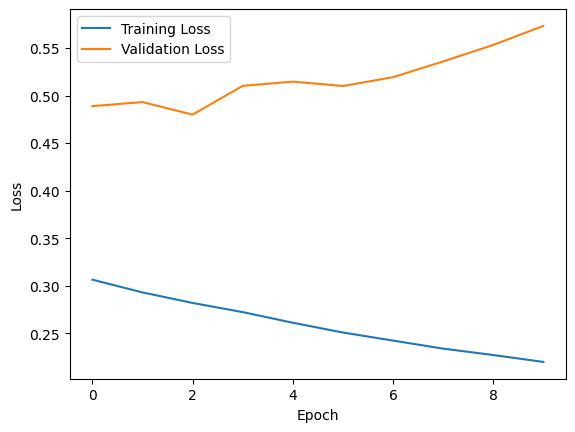

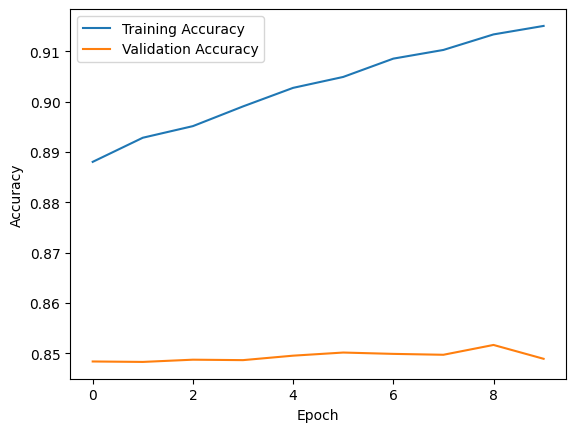

In [ ]:
# Plot loss and accuracy for MLP for the reduced learning rate
plt.plot(mlp_history_2.history['loss'], label='Training Loss')
plt.plot(mlp_history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(mlp_history_2.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Plotting the confusion matrix and precision scores



588/588 [==============================] - 2s 3ms/step
[[273   0   0 ...   0   0   0]
 [  0 313   0 ...   0   0   0]
 [  0   0 331 ...   0   0   0]
 ...
 [  0   0   0 ... 199   0   1]
 [  0   0   0 ...   0 361   5]
 [  0   1   0 ...   0   2 355]]


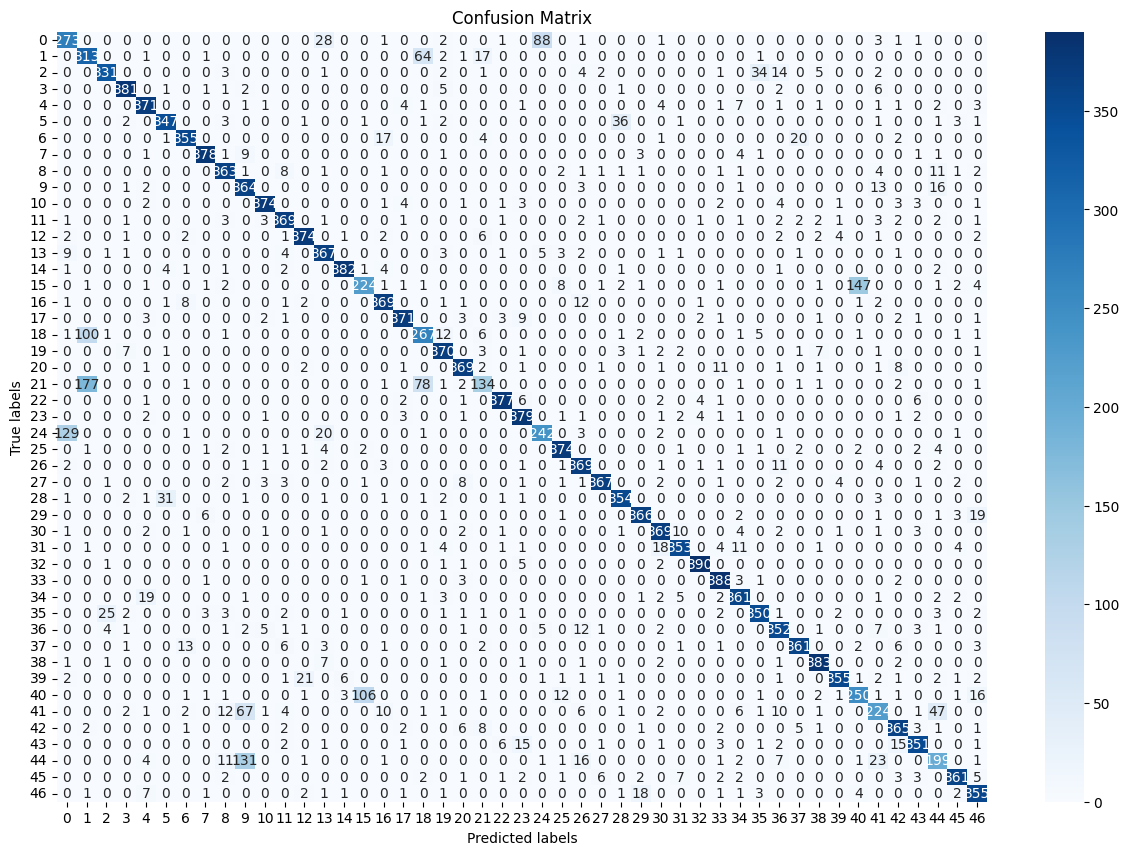

In [ ]:
# Make predictions on the test set
predictions = mlp_reduced.predict(X_test)
mlp_predicted_labels = np.argmax(predictions, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, mlp_predicted_labels)
print(cm)
# Plot confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(47), yticklabels=range(47))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate and print classification report for MLP
class_names = [str(i) for i in range(47)]
print(classification_report(y_test, mlp_predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       400
           1       0.53      0.78      0.63       400
           2       0.91      0.83      0.87       400
           3       0.95      0.95      0.95       400
           4       0.89      0.93      0.91       400
           5       0.90      0.87      0.88       400
           6       0.92      0.89      0.90       400
           7       0.96      0.94      0.95       400
           8       0.88      0.91      0.89       400
           9       0.63      0.91      0.74       400
          10       0.95      0.94      0.94       400
          11       0.90      0.92      0.91       400
          12       0.92      0.94      0.93       400
          13       0.84      0.92      0.88       400
          14       0.97      0.95      0.96       400
          15       0.67      0.56      0.61       400
          16       0.89      0.92      0.91       400
          17       0.95    

#### Building the tuned CNN Model

In [16]:
from tensorflow.keras import layers
# Building the CNN Model by first declaring the tuners for the hyperparameters
def build_cnn_model(hp):
    model = Sequential()

    # Explore number of convolutional layers and filters
    for i in range(hp.Int('conv_layers', 1, 3)):
        model.add(layers.Conv2D(filters=hp.Int('filters_' + str(i), min_value=32, max_value=256, step=32),
                                 kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    # Explore number of dense layers and neurons
    for i in range(hp.Int('dense_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))

    # Output layer
    model.add(layers.Dense(47, activation='softmax'))

    # Explore Batch Normalization
    if hp.Boolean('batch_normalization'):
        model.add(layers.BatchNormalization())

    # Explore L1 & L2 regularization
    hp_regularizer = hp.Choice('regularization', values=['none', 'l1', 'l2'])
    if hp_regularizer == 'l1':
        model.add(layers.Dense(units=47, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
    elif hp_regularizer == 'l2':
        model.add(layers.Dense(units=47, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    else:
        model.add(layers.Dense(units=47, activation='softmax'))

    # Explore Dropout
    if hp.Boolean('dropout'):
        model.add(layers.Dropout(0.5))

    # Compile model
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    model.compile(optimizer=hp_optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [17]:
# Define tuner
cnn_tuner = RandomSearch(
    build_cnn_model,
    objective='val_accuracy',
    max_trials=10,
    directory='cnn_keras_tuner_results',
    project_name='emnist_mlp_classification'
)

In [19]:
# Tuning the Hyperparamter for CNN
cnn_tuner.search(X_train, y_train, epochs=10, validation_split=0.1)

Trial 10 Complete [00h 03m 15s]
val_accuracy: 0.27322694659233093

Best val_accuracy So Far: 0.8677304983139038
Total elapsed time: 00h 32m 28s


In [20]:
# Getting the optimised hyperparameters listed
cnn_tuner.get_best_hyperparameters()[0].values

{'conv_layers': 2,
 'filters_0': 256,
 'dense_layers': 2,
 'units_0': 224,
 'batch_normalization': True,
 'regularization': 'l1',
 'dropout': False,
 'optimizer': 'adam',
 'units_1': 128,
 'units_2': 32,
 'filters_1': 64,
 'filters_2': 128}

In [21]:
# Creating two instances for the two callbacks and adaptive learning rates we are going use
cnn_scheduled=cnn_tuner.get_best_models(num_models=1)[0]
cnn_reduced=cnn_tuner.get_best_models(num_models=1)[0]

In [25]:
start_time = time.time()
cnn_history_1 = cnn_scheduled.fit(X_train, y_train, epochs = 20, initial_epoch = 10, validation_split = 0.1, callbacks = [callback1])
end_time = time.time()
run_time = end_time - start_time
# Printing the runtime for scheduled lr runtime
print(f'The total runtime is = {run_time}')

Epoch 11/20
3173/3173 [==============================] - 22s 6ms/step - loss: 0.5642 - accuracy: 0.8983 - val_loss: 0.6945 - val_accuracy: 0.8658 - lr: 9.0484e-04
Epoch 12/20
3173/3173 [==============================] - 20s 6ms/step - loss: 0.5310 - accuracy: 0.9036 - val_loss: 0.6896 - val_accuracy: 0.8738 - lr: 8.1873e-04
Epoch 13/20
3173/3173 [==============================] - 20s 6ms/step - loss: 0.4992 - accuracy: 0.9105 - val_loss: 0.6785 - val_accuracy: 0.8761 - lr: 7.4082e-04
Epoch 14/20
3173/3173 [==============================] - 19s 6ms/step - loss: 0.4723 - accuracy: 0.9150 - val_loss: 0.6754 - val_accuracy: 0.8742 - lr: 6.7032e-04
Epoch 15/20
3173/3173 [==============================] - 19s 6ms/step - loss: 0.4469 - accuracy: 0.9205 - val_loss: 0.7085 - val_accuracy: 0.8663 - lr: 6.0653e-04
Epoch 16/20
3173/3173 [==============================] - 19s 6ms/step - loss: 0.4252 - accuracy: 0.9243 - val_loss: 0.6953 - val_accuracy: 0.8715 - lr: 5.4881e-04
Epoch 17/20
3173/3173 

In [27]:
# Trying to asses and find out the accuracy
cnn_scheduled.evaluate(X_test, y_test)

588/588 [==============================] - 3s 5ms/step - loss: 0.7219 - accuracy: 0.8782


In [28]:
start_time = time.time()
cnn_history_1 = cnn_reduced.fit(X_train, y_train, epochs = 20, initial_epoch = 10, validation_split = 0.1, callbacks = [callback1])
end_time = time.time()
run_time = end_time - start_time
# Printing the runtime for scheduled lr runtime
print(f'The total runtime is = {run_time}')

Epoch 11/20
3173/3173 [==============================] - 24s 7ms/step - loss: 0.5643 - accuracy: 0.8983 - val_loss: 0.7026 - val_accuracy: 0.8685 - lr: 9.0484e-04
Epoch 12/20
3173/3173 [==============================] - 20s 6ms/step - loss: 0.5318 - accuracy: 0.9037 - val_loss: 0.6919 - val_accuracy: 0.8728 - lr: 8.1873e-04
Epoch 13/20
3173/3173 [==============================] - 20s 6ms/step - loss: 0.4994 - accuracy: 0.9094 - val_loss: 0.6914 - val_accuracy: 0.8642 - lr: 7.4082e-04
Epoch 14/20
3173/3173 [==============================] - 20s 6ms/step - loss: 0.4727 - accuracy: 0.9157 - val_loss: 0.7107 - val_accuracy: 0.8694 - lr: 6.7032e-04
Epoch 15/20
3173/3173 [==============================] - 19s 6ms/step - loss: 0.4497 - accuracy: 0.9194 - val_loss: 0.7059 - val_accuracy: 0.8684 - lr: 6.0653e-04
Epoch 16/20
3173/3173 [==============================] - 20s 6ms/step - loss: 0.4301 - accuracy: 0.9239 - val_loss: 0.6987 - val_accuracy: 0.8738 - lr: 5.4881e-04
Epoch 17/20
3173/3173 

In [29]:
# Trying to asses and find out the accuracy
cnn_reduced.evaluate(X_test, y_test)

588/588 [==============================] - 3s 6ms/step - loss: 0.7488 - accuracy: 0.8766


[0.7487985491752625, 0.8766489624977112]

#### Plotting the loss and accuracy for each epoch for the best run

588/588 [==============================] - 2s 3ms/step
[[313   0   1 ...   0   0   0]
 [  0 275   0 ...   0   0   0]
 [  0   0 353 ...   1   0   0]
 ...
 [  0   0   0 ... 269   0   0]
 [  0   0   0 ...   0 380   1]
 [  0   0   0 ...   0   3 367]]


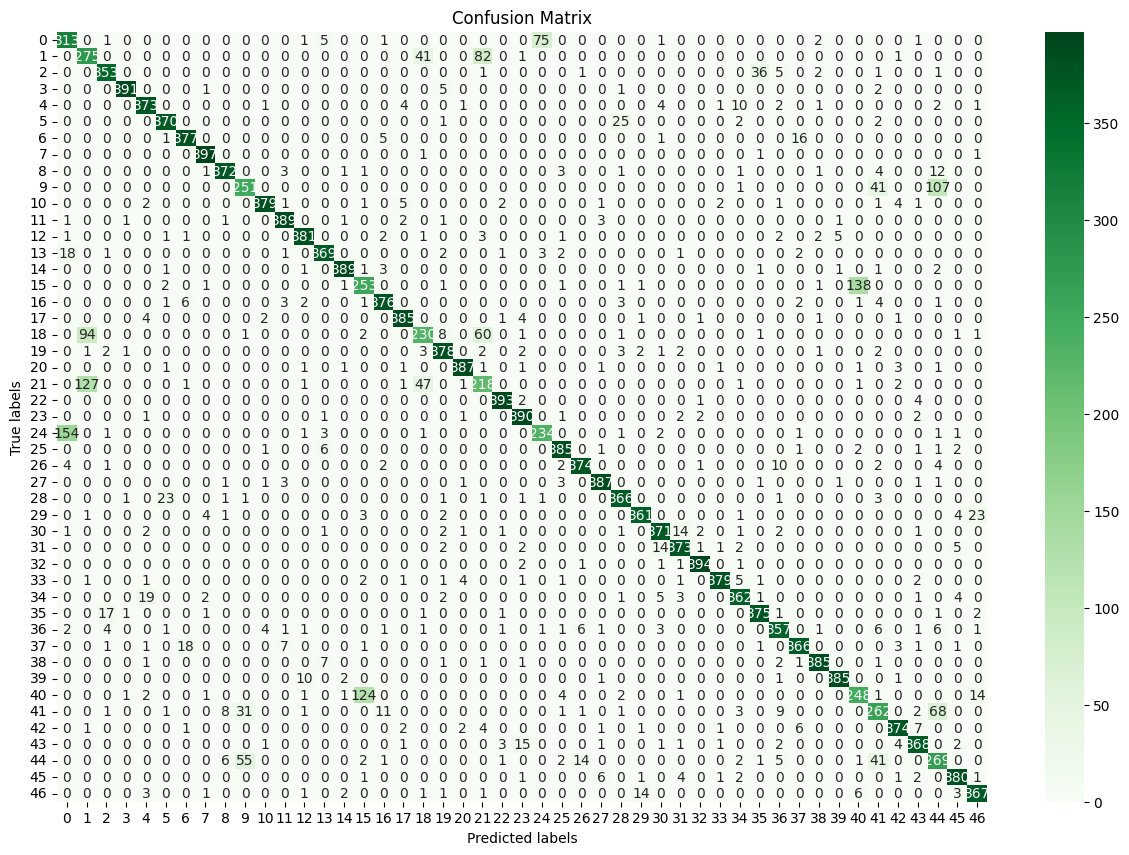

In [33]:
# Make predictions on the test set using CNN Scheduled Learmning Rate
predictions = cnn_scheduled.predict(X_test)
cnn_predicted_labels = np.argmax(predictions, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, mlp_predicted_labels)
print(cm)
# Plot confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=range(47), yticklabels=range(47))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Calculate and print classification report for CNN
class_names = [str(i) for i in range(47)]
print(classification_report(y_test, cnn_predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       400
           1       0.55      0.69      0.61       400
           2       0.92      0.88      0.90       400
           3       0.99      0.98      0.98       400
           4       0.91      0.93      0.92       400
           5       0.92      0.93      0.92       400
           6       0.93      0.94      0.94       400
           7       0.97      0.99      0.98       400
           8       0.95      0.93      0.94       400
           9       0.74      0.63      0.68       400
          10       0.97      0.95      0.96       400
          11       0.95      0.97      0.96       400
          12       0.95      0.95      0.95       400
          13       0.94      0.92      0.93       400
          14       0.98      0.97      0.97       400
          15       0.65      0.63      0.64       400
          16       0.94      0.94      0.94       400
          17       0.96    

### Printing 6 results from the testing dataset Using the CNN Model

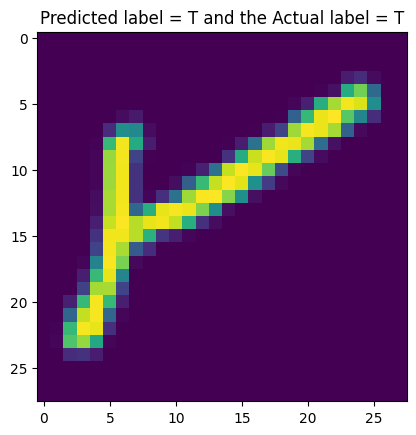

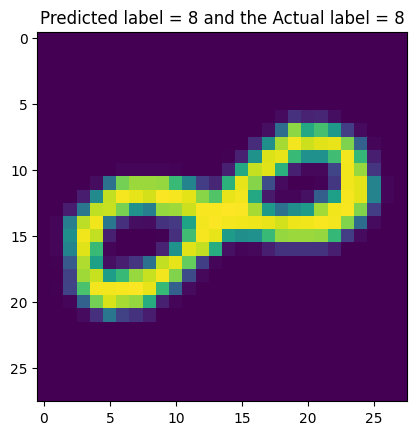

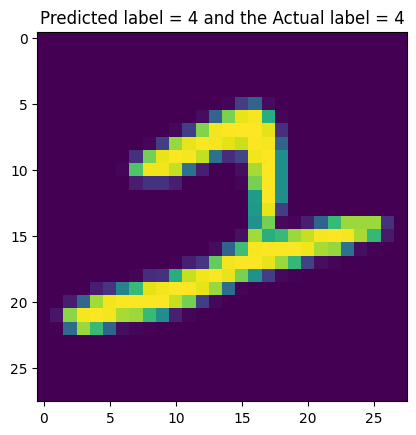

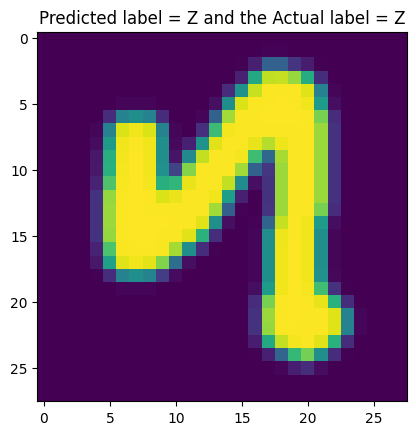

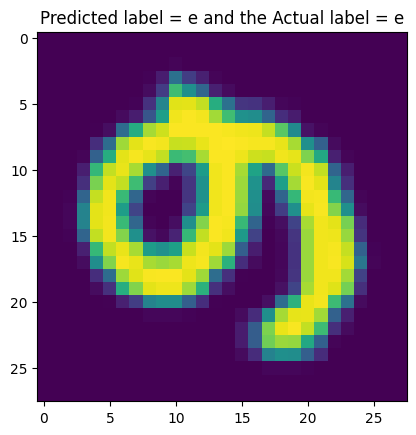

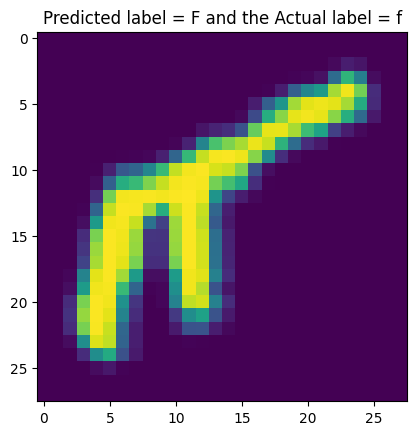

In [40]:
for i in range (20,26):
  plt.imshow(X_test[i])
  plt.title(f'Predicted label = {class_mapp[cnn_predicted_labels[i]]} and the Actual label = {class_mapp[test_target[i]]}')
  plt.show()